<h2 style="text-align:center;">📦 3D Object Detection using MediaPipe Objectron</h2>

This notebook demonstrates **3D Object Detection** using **MediaPipe Objectron**.  
It performs **3D bounding box estimation** for common objects (like cups, shoes, chairs, and cameras) in both **static images** and **real-time webcam video**.  
Works seamlessly in **VSCode** and **Colab** environments.


<h2 style="text-align:center;">🧠 Theory Overview</h2>

**MediaPipe Objectron** is a real-time 3D object detection framework that estimates **3D bounding boxes** around everyday objects from RGB images or videos.  
It can detect and track objects such as **Cup, Shoe, Chair, and Camera**.

**How It Works:**
1. A **neural network** predicts 2D keypoints of the object.  
2. Another model estimates the **3D pose** (rotation + translation).  
3. The system renders **3D bounding boxes** and coordinate axes in real-time.

**Applications:**
- AR/VR 🥽
- Robotics 🤖
- 3D Scene Understanding 🧩
- Virtual Try-On 👟


<h2 style="text-align:center;">⚙️ Setup and Imports</h2>

In [2]:
import cv2
import urllib
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Libraries imported successfully!


<h2 style="text-align:center;">🖼️ Static Image 3D Detection Demo</h2>

This demo fetches an image from the web and detects 3D bounding boxes using MediaPipe Objectron.  
(Adapted from your sir’s original script: **3D Object Detection (3D Bounding Boxes) with MediaPipe Objectron.py**)


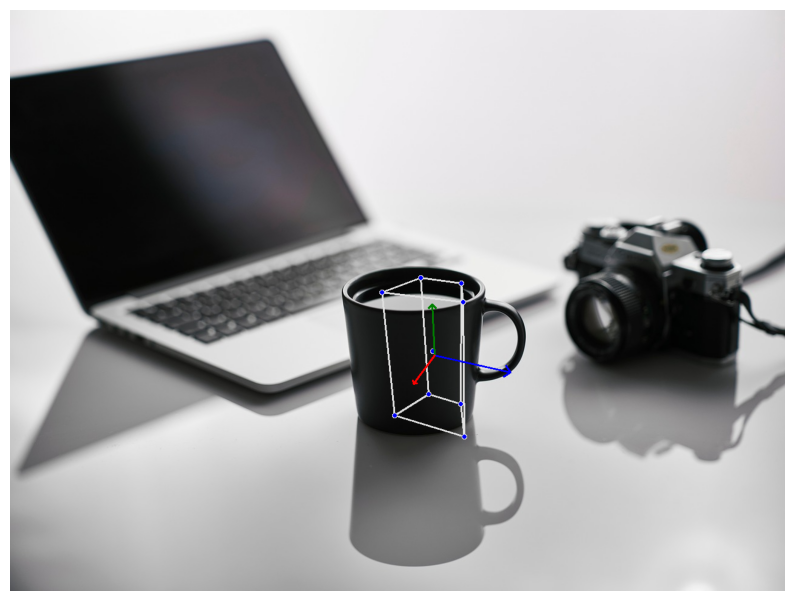

In [14]:
# ➤ Initialize Objectron for static images
mp_objectron = mp.solutions.objectron
mp_drawing = mp.solutions.drawing_utils

# ➤ Load image from local file
image_path = r"C:\Users\MUBASSHIR\OneDrive\Desktop\FSDS_TASKS\Deep_Learning\05_MediaPipe_Applications\05_Objectron_3D_Object_Detection\2.jpg"

# Read and convert image to RGB
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Could not load image from path: {image_path}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ➤ Initialize Objectron Model
objectron = mp_objectron.Objectron(
    static_image_mode=True,
    max_num_objects=5,
    min_detection_confidence=0.3,
    model_name='Cup'   # You can change to 'Chair', 'Shoe', or 'Camera' too
)

# ➤ Process the image
results = objectron.process(image)
annotated = image.copy()

# ➤ Draw 3D bounding box and axes
if results.detected_objects:
    for obj in results.detected_objects:
        mp_drawing.draw_landmarks(annotated, obj.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
        mp_drawing.draw_axis(annotated, obj.rotation, obj.translation)
else:
    print("No objects detected in the image.")

# ➤ Display output
plt.figure(figsize=(10,10))
plt.imshow(annotated)
plt.axis('off')
plt.show()


<h2 style="text-align:center;">🎥 Real-Time 3D Detection (Webcam)</h2>

Below code detects 3D bounding boxes around objects using your webcam.  
Press **ESC** to stop the stream.


In [15]:
import cv2
import mediapipe as mp
import time

mp_objectron = mp.solutions.objectron
mp_drawing = mp.solutions.drawing_utils

objectron = mp_objectron.Objectron(
    static_image_mode=False,
    max_num_objects=5,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.8,
    model_name='Cup'
)

cap = cv2.VideoCapture(0)
prev_time = 0

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    frame = cv2.flip(frame, 1)
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = objectron.process(rgb)

    if results.detected_objects:
        for detected_object in results.detected_objects:
            mp_drawing.draw_landmarks(frame, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
            mp_drawing.draw_axis(frame, detected_object.rotation, detected_object.translation)

    # ➤ FPS
    curr_time = time.time()
    fps = 1 / (curr_time - prev_time) if prev_time else 0
    prev_time = curr_time
    cv2.putText(frame, f"FPS: {int(fps)}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    cv2.imshow("3D Object Detection - MediaPipe Objectron", frame)
    if cv2.waitKey(5) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

<h2 style="text-align:center;">📜 Reference: Sir’s Original Code</h2>

Below are your instructor’s original MediaPipe Objectron scripts for comparison.


In [ ]:
# 3D Object Detection from Image
# Adapted from: 3D Object Detection (3D Bounding Boxes) with MediaPipe Objectron.py

# 3D Object Detection from Video
# Adapted from: 3D Object Detection from Video.py

<h2 style="text-align:center;">🧾 Summary</h2>

| Topic | Covered |
|--------|----------|
| Objectron Overview | ✅ |
| Static Image Detection | ✅ |
| Real-Time Webcam Detection | ✅ |
| Instructor’s Reference Code | ✅ |
| FSDS Formatting + Documentation | ✅ |

Next: **Holistic Model Integration (Face + Hand + Pose)** 🤖
